# Georgia Household Income Analysis


### Project Overview

The dataset used is from unitedforalice.org. ALICE stands for Asset Limited, Income Constrained, Employed which represents people living above the Federal Poverty level but still unable to afford basic essentials in Georgia.

This project aims to understand how the state of the economy and policies affect households in Georgia by answering the following questions:

1. Are households going into ALICE income levels over the years or is it getting better? 
2. How many households are in the ALICE income level?
3. How did covid affect households in Georgia?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [4]:
#load dataset into pandas dataframe
df = pd.read_excel('DataSheet_GA.xlsx', sheet_name = 1)
df_final = df.copy()
original = df.copy()
display(df.head())
print(df.shape)

,Year,GEO.id2,GEO.display_label,County,State,State Abbr,Households,Poverty Households,ALICE Households,Above ALICE Households,ALICE Threshold - HH under 65,ALICE Threshold - HH 65 years and over,Source: American Community Survey
0,2010,13001,"Appling County, Georgia",Appling,Georgia,GA,7145,1328,1570,4247,30000,25000,5-Year
1,2012,13001,"Appling County, Georgia",Appling,Georgia,GA,7047,1298,1955,3794,35000,30000,5-Year
2,2014,13001,"Appling County, Georgia",Appling,Georgia,GA,6878,1457,1953,3468,40000,35000,5-Year
3,2016,13001,"Appling County, Georgia",Appling,Georgia,GA,6711,1393,2024,3294,40000,35000,5-Year
4,2018,13001,"Appling County, Georgia",Appling,Georgia,GA,6682,1478,1962,3242,45000,35000,5-Year


(1113, 13)


In [5]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1113 entries, 0 to 1112
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Year                                    1113 non-null   int64 
 1   GEO.id2                                 1113 non-null   int64 
 2   GEO.display_label                       1113 non-null   object
 3   County                                  1113 non-null   object
 4   State                                   1113 non-null   object
 5   State Abbr                              1113 non-null   object
 6   Households                              1113 non-null   int64 
 7   Poverty Households                      1113 non-null   int64 
 8   ALICE Households                        1113 non-null   int64 
 9   Above ALICE Households                  1113 non-null   int64 
 10  ALICE Threshold - HH under 65           1113 non-null   int64 
 11  ALIC

In [ ]:


#create training and test datasets
train, test = train_test_split(df, train_size = 0.7, test_size=0.3, random_state=42)
y_train = train.copy()

X_train = train.copy()
X_train.drop(columns=['ALICE Households'], inplace=True)

y_test = test.copy()

X_test = test.copy()
X_test.drop(columns=['ALICE Households'], inplace=True)

In [ ]:
print(df.columns)
display(y_train.head())

#remove columns that are irrelevant for regression
X_train.drop(columns='State Abbr', inplace=True)
X_train.drop(columns='GEO.display_label', inplace=True)
X_train.drop(columns='County', inplace=True)
X_train.drop(columns='State', inplace=True)
X_train.drop(columns='GEO.id2', inplace=True)

X_test.drop(columns='State Abbr', inplace=True)
X_test.drop(columns='GEO.display_label', inplace=True)
X_test.drop(columns='County', inplace=True)
X_test.drop(columns='State', inplace=True)
X_test.drop(columns='GEO.id2', inplace=True)

y_train.drop(columns='State Abbr', inplace=True)
y_train.drop(columns='GEO.display_label', inplace=True)
y_train.drop(columns='County', inplace=True)
y_train.drop(columns='State', inplace=True)
y_train.drop(columns='GEO.id2', inplace=True)

y_test.drop(columns='State Abbr', inplace=True)
y_test.drop(columns='GEO.display_label', inplace=True)
y_test.drop(columns='County', inplace=True)
y_test.drop(columns='State', inplace=True)
y_test.drop(columns='GEO.id2', inplace=True)

Index(['Year', 'GEO.id2', 'GEO.display_label', 'County', 'State', 'State Abbr',
       'Households', 'Poverty Households', 'ALICE Households',
       'Above ALICE Households', 'ALICE Threshold - HH under 65',
       'ALICE Threshold - HH 65 years and over',
       'Source: American Community Survey '],
      dtype='object')


,Year,GEO.id2,GEO.display_label,County,State,State Abbr,Households,Poverty Households,ALICE Households,Above ALICE Households,ALICE Threshold - HH under 65,ALICE Threshold - HH 65 years and over,Source: American Community Survey
254,2014,13075,"Cook County, Georgia",Cook,Georgia,GA,6255,1436,1929,2890,40000,35000,5-Year
812,2010,13237,"Putnam County, Georgia",Putnam,Georgia,GA,8728,1308,2143,5277,30000,30000,3-Year
312,2018,13091,"Dodge County, Georgia",Dodge,Georgia,GA,7694,1867,2531,3296,45000,35000,5-Year
490,2010,13143,"Haralson County, Georgia",Haralson,Georgia,GA,10603,2513,2281,5809,35000,30000,3-Year
221,2018,13065,"Clinch County, Georgia",Clinch,Georgia,GA,2502,911,691,900,45000,35000,5-Year


In [ ]:
#check to see what kind of values are in this column
print(df['Source: American Community Survey '].unique())

['5-Year' '3-Year' '1-Year']


In [ ]:
#clean up the datasets so that we only have data that are surveyed for at least 5 years
X_train_year = X_train[X_train['Source: American Community Survey '] == '5-Year']
y_train_year = y_train[y_train['Source: American Community Survey '] == '5-Year']

X_test_year = X_test[X_test['Source: American Community Survey '] == '5-Year']
y_test_year = y_test[y_test['Source: American Community Survey '] == '5-Year']

display(y_train_year)

,Year,Households,Poverty Households,ALICE Households,Above ALICE Households,ALICE Threshold - HH under 65,ALICE Threshold - HH 65 years and over,Source: American Community Survey
254,2014,6255,1436,1929,2890,40000,35000,5-Year
312,2018,7694,1867,2531,3296,45000,35000,5-Year
221,2018,2502,911,691,900,45000,35000,5-Year
235,2018,14298,3217,5062,6019,50000,35000,5-Year
688,2014,8083,1821,2404,3858,40000,35000,5-Year
...,...,...,...,...,...,...,...,...
871,2016,3312,653,1123,1536,40000,35000,5-Year
87,2016,6423,1164,2479,2780,45000,35000,5-Year
121,2014,7781,1315,2065,4401,45000,35000,5-Year
1095,2016,3975,999,1178,1798,40000,35000,5-Year


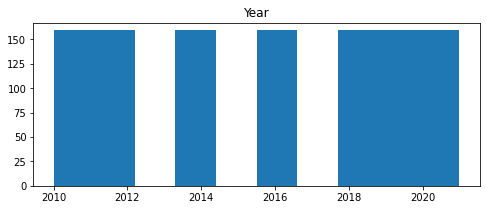

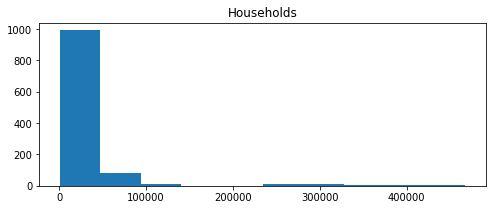

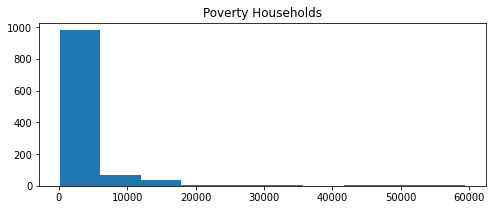

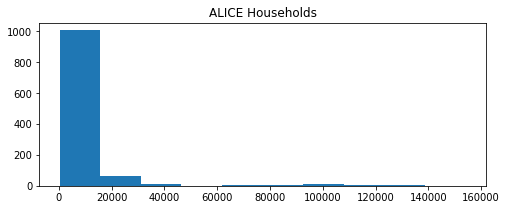

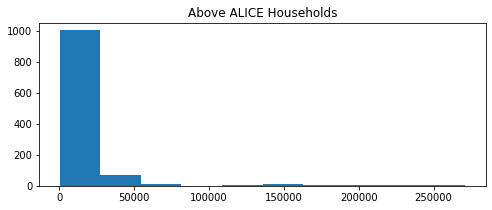

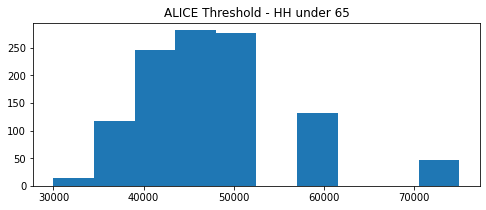

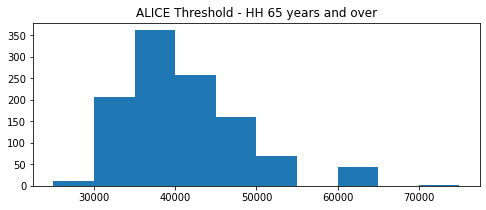

In [ ]:

#check for any missing values or outliers
df.isna().sum()

numerical_variables = ['Year', 'Households', 'Poverty Households', 'ALICE Households',
       'Above ALICE Households', 'ALICE Threshold - HH under 65',
       'ALICE Threshold - HH 65 years and over',]
for variable in numerical_variables:
    plt.figure(figsize=(8,3))
    plt.title(variable)
    plt.hist(df[variable])
    plt.show()

In [ ]:
#use interquartile range to remove outliers from dataset
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))]
outliers = outliers.dropna(how='all')

X_train_outliers = X_train_year[~X_train_year.index.isin(outliers.index)]
X_test_outliers = X_test_year[~X_test_year.index.isin(outliers.index)]
X_train_outliers.drop(columns='Source: American Community Survey ', inplace=True)
X_test_outliers.drop(columns='Source: American Community Survey ', inplace=True)

y_train_outliers = y_train_year[~X_train_year.index.isin(outliers.index)]
y_test_outliers = y_test_year[~X_test_year.index.isin(outliers.index)]
y_train_outliers.drop(columns='Source: American Community Survey ', inplace=True)
y_test_outliers.drop(columns='Source: American Community Survey ', inplace=True)

<ipython-input-9-84083573de9c>:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = df[(df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))]
<ipython-input-9-84083573de9c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_outliers.drop(columns='Source: American Community Survey ', inplace=True)
<ipython-input-9-84083573de9c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_outliers.drop(columns='Source: American Community Survey 

In [ ]:
#loop through different number of features and choose the one with the best r-squared value in order to select the 
#most relevant features
col_len = (len(df.columns))

lm = LinearRegression()

for i in range(1, col_len+1):
    rfe = RFE(lm, n_features_to_select=i)
    rfe = rfe.fit(X_train_outliers, y_train_outliers)
    
    y_predicted = rfe.predict(X_test_outliers)

    r2 = sklearn.metrics.r2_score(y_test_outliers, y_predicted)
    print(r2)
    display(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))

0.4337028691234272


[('Year', False, 6),
 ('Households', False, 3),
 ('Poverty Households', True, 1),
 ('Above ALICE Households', False, 2),
 ('ALICE Threshold - HH under 65', False, 5),
 ('ALICE Threshold - HH 65 years and over', False, 4)]

0.6029052590323021


[('Year', False, 5),
 ('Households', False, 2),
 ('Poverty Households', True, 1),
 ('Above ALICE Households', True, 1),
 ('ALICE Threshold - HH under 65', False, 4),
 ('ALICE Threshold - HH 65 years and over', False, 3)]

0.6448220670952126


[('Year', False, 4),
 ('Households', True, 1),
 ('Poverty Households', True, 1),
 ('Above ALICE Households', True, 1),
 ('ALICE Threshold - HH under 65', False, 3),
 ('ALICE Threshold - HH 65 years and over', False, 2)]

0.86946921155374


[('Year', False, 3),
 ('Households', True, 1),
 ('Poverty Households', True, 1),
 ('Above ALICE Households', True, 1),
 ('ALICE Threshold - HH under 65', False, 2),
 ('ALICE Threshold - HH 65 years and over', True, 1)]

0.9430057839995761


[('Year', False, 2),
 ('Households', True, 1),
 ('Poverty Households', True, 1),
 ('Above ALICE Households', True, 1),
 ('ALICE Threshold - HH under 65', True, 1),
 ('ALICE Threshold - HH 65 years and over', True, 1)]

1.0


[('Year', True, 1),
 ('Households', True, 1),
 ('Poverty Households', True, 1),
 ('Above ALICE Households', True, 1),
 ('ALICE Threshold - HH under 65', True, 1),
 ('ALICE Threshold - HH 65 years and over', True, 1)]

1.0


[('Year', True, 1),
 ('Households', True, 1),
 ('Poverty Households', True, 1),
 ('Above ALICE Households', True, 1),
 ('ALICE Threshold - HH under 65', True, 1),
 ('ALICE Threshold - HH 65 years and over', True, 1)]

1.0


[('Year', True, 1),
 ('Households', True, 1),
 ('Poverty Households', True, 1),
 ('Above ALICE Households', True, 1),
 ('ALICE Threshold - HH under 65', True, 1),
 ('ALICE Threshold - HH 65 years and over', True, 1)]

1.0


[('Year', True, 1),
 ('Households', True, 1),
 ('Poverty Households', True, 1),
 ('Above ALICE Households', True, 1),
 ('ALICE Threshold - HH under 65', True, 1),
 ('ALICE Threshold - HH 65 years and over', True, 1)]

1.0


[('Year', True, 1),
 ('Households', True, 1),
 ('Poverty Households', True, 1),
 ('Above ALICE Households', True, 1),
 ('ALICE Threshold - HH under 65', True, 1),
 ('ALICE Threshold - HH 65 years and over', True, 1)]

1.0


[('Year', True, 1),
 ('Households', True, 1),
 ('Poverty Households', True, 1),
 ('Above ALICE Households', True, 1),
 ('ALICE Threshold - HH under 65', True, 1),
 ('ALICE Threshold - HH 65 years and over', True, 1)]

1.0


[('Year', True, 1),
 ('Households', True, 1),
 ('Poverty Households', True, 1),
 ('Above ALICE Households', True, 1),
 ('ALICE Threshold - HH under 65', True, 1),
 ('ALICE Threshold - HH 65 years and over', True, 1)]

1.0


[('Year', True, 1),
 ('Households', True, 1),
 ('Poverty Households', True, 1),
 ('Above ALICE Households', True, 1),
 ('ALICE Threshold - HH under 65', True, 1),
 ('ALICE Threshold - HH 65 years and over', True, 1)]

In [ ]:
columns_to_keep = ['Poverty Households', 'Households', 'Above ALICE Households']
df_final.drop(columns=df.columns.difference(columns_to_keep), inplace=True)
X_train_cleaned = X_train_outliers.drop(columns=X_train_outliers.columns.difference(columns_to_keep))
X_test_cleaned = X_test_outliers.drop(columns=X_test_outliers.columns.difference(columns_to_keep))

y_train_cleaned = y_train_outliers.pop('ALICE Households')
y_test_cleaned = y_test_outliers.pop('ALICE Households')

In [ ]:
#we are selecting only 3 features since they have the best
#to predict the target variable without overfitting the model. 
rfe = RFE(lm, n_features_to_select=3)
rfe = rfe.fit(X_train_cleaned, y_train_cleaned)

y_predicted = rfe.predict(df_final)
display(y_predicted)

array([1570., 1955., 1953., ..., 2339., 2462., 2726.])

In [ ]:
original['Predicted'] = y_predicted
display(original.head())

,Year,GEO.id2,GEO.display_label,County,State,State Abbr,Households,Poverty Households,ALICE Households,Above ALICE Households,ALICE Threshold - HH under 65,ALICE Threshold - HH 65 years and over,Source: American Community Survey,Predicted
0,2010,13001,"Appling County, Georgia",Appling,Georgia,GA,7145,1328,1570,4247,30000,25000,5-Year,1570.0
1,2012,13001,"Appling County, Georgia",Appling,Georgia,GA,7047,1298,1955,3794,35000,30000,5-Year,1955.0
2,2014,13001,"Appling County, Georgia",Appling,Georgia,GA,6878,1457,1953,3468,40000,35000,5-Year,1953.0
3,2016,13001,"Appling County, Georgia",Appling,Georgia,GA,6711,1393,2024,3294,40000,35000,5-Year,2024.0
4,2018,13001,"Appling County, Georgia",Appling,Georgia,GA,6682,1478,1962,3242,45000,35000,5-Year,1962.0


In [ ]:
total = (original['Predicted'] > original['ALICE Households']).sum()

print("Total 'ALICE Households':", len(original['ALICE Households']))
print("Total occurrences where 'Predicted' > 'ALICE Households':", total)

Total 'ALICE Households': 1113
Total occurrences where 'Predicted' > 'ALICE Households': 425


In [ ]:
print(df['Year'].unique())

[2010 2012 2014 2016 2018 2019 2021]


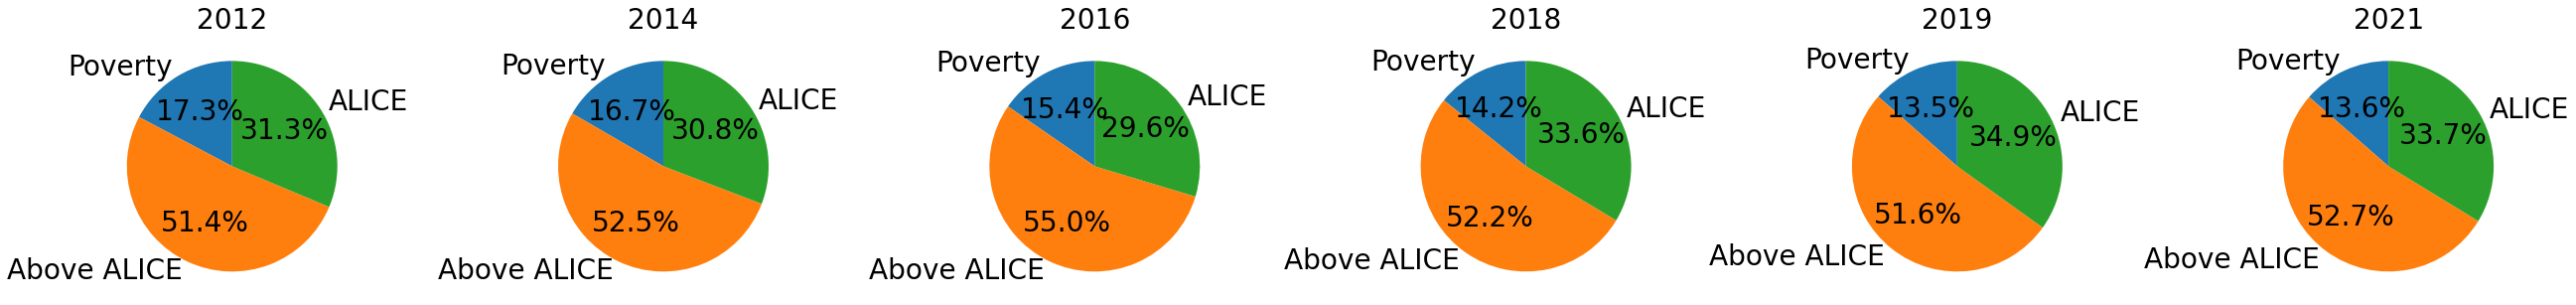

In [ ]:
#pie chart for the past 9 years
df_2021 = df[df['Year'] == 2021]
df_2018 = df[df['Year'] == 2018]
df_2019 = df[df['Year'] == 2019]
df_2016 = df[df['Year'] == 2016]
df_2014 = df[df['Year'] == 2014]
df_2012 = df[df['Year'] == 2012]
df_2022 = original[original['Year'] == 2021]


total_households_2021 = df_2021['Households'].sum()
total_poverty_2021 = df_2021['Poverty Households'].sum()
total_above_2021 = df_2021['Above ALICE Households'].sum()
total_ALICE_2021 = df_2021['ALICE Households'].sum()

total_households_2018 = df_2018['Households'].sum()
total_poverty_2018 = df_2018['Poverty Households'].sum()
total_above_2018 = df_2018['Above ALICE Households'].sum()
total_ALICE_2018 = df_2018['ALICE Households'].sum()

total_households_2019 = df_2019['Households'].sum()
total_poverty_2019 = df_2019['Poverty Households'].sum()
total_above_2019 = df_2019['Above ALICE Households'].sum()
total_ALICE_2019 = df_2019['ALICE Households'].sum()

total_households_2016 = df_2016['Households'].sum()
total_poverty_2016 = df_2016['Poverty Households'].sum()
total_above_2016 = df_2016['Above ALICE Households'].sum()
total_ALICE_2016 = df_2016['ALICE Households'].sum()

total_households_2014 = df_2014['Households'].sum()
total_poverty_2014 = df_2014['Poverty Households'].sum()
total_above_2014 = df_2014['Above ALICE Households'].sum()
total_ALICE_2014 = df_2014['ALICE Households'].sum()

total_households_2012 = df_2012['Households'].sum()
total_poverty_2012 = df_2012['Poverty Households'].sum()
total_above_2012 = df_2012['Above ALICE Households'].sum()
total_ALICE_2012 = df_2012['ALICE Households'].sum()

labels = ['Poverty', 'Above ALICE', 'ALICE']
sizes_1 = [total_poverty_2012, total_above_2012, total_ALICE_2012]
sizes_2 = [total_poverty_2014, total_above_2014, total_ALICE_2014]
sizes_3 = [total_poverty_2016, total_above_2016, total_ALICE_2016]
sizes_4 = [total_poverty_2018, total_above_2018, total_ALICE_2018]
sizes_5 = [total_poverty_2019, total_above_2019, total_ALICE_2019]
sizes_6 = [total_poverty_2021, total_above_2021, total_ALICE_2021]

#create subplots18,8
fig, axs = plt.subplots(1, 6, figsize=(36, 16))  # 1 row, 6 columns

#plot first pie chart
axs[0].pie(sizes_1, labels=labels, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 28})
axs[0].set_title('2012', fontsize=28)

#plot second pie chart
axs[1].pie(sizes_2, labels=labels, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 28})
axs[1].set_title('2014', fontsize=28)

#plot third pie chart
axs[2].pie(sizes_3, labels=labels, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 28})
axs[2].set_title('2016', fontsize=28)

#plot fourth pie chart
axs[3].pie(sizes_4, labels=labels, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 28})
axs[3].set_title('2018', fontsize=28)

#plot fifth pie chart
axs[4].pie(sizes_5, labels=labels, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 28})
axs[4].set_title('2019', fontsize=28)

#plot sixth pie chart
axs[5].pie(sizes_6, labels=labels, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 28})
axs[5].set_title('2021', fontsize=28)


plt.tight_layout()
plt.show()

In [ ]:
total_ALICE_2022_predicted = df_2022['Predicted'].sum()

percentage_increase = ((total_ALICE_2022_predicted - total_ALICE_2021) / total_ALICE_2021) * 100
print(percentage_increase)

1.746260386960794e-14


### Summary of Findings

To summarize, the analysis in the dataset for my questions led to the following discoveries for each:

1. From 2012 to 2016, households in the ALICE income level have remained the same. Then in the following years, the amount of households entering the ALICE income levels increased by a moderate amount. This could be due to the policies and programs put in place by the government during those times.

2. In Georgia, around 30% of households were in the ALICE income level in the past 9 years. Although households in the ALICE income range were relatively similar over the years, households in poverty have dropped consistently. This could mean that people are able to escape the federal poverty level but still are unable to afford life's basic necessities. Government policies and programs appear to have helped households in poverty but will need more innovative policies to help households in the ALICE income level.

3. The peak covid era happened from 2020-2021. We don't have data but we do have it for 2021. It looks like covid did not really affect household income much. It would be reasonable to assume that future huge events that cause worldwide shutdowns would not affect households drastically. After predicting the amount of households in the ALICE income level for 2022, there is almost no change. Based on the ALICE income level in 2018 and 2021, the predicted ALICE income level could be possible.

### Potential Problems


Some potential problems with this analysis could be that the model could be affected by outside data that we would not have access to. For example, we would not be able to predict what policies or programs would be put in place in the future. This could change the income levels of households.